### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

# Exibindo os resultados
print(f"Faturamento Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento Loja 1: R$ 1534509.12
Faturamento Loja 2: R$ 1488459.06
Faturamento Loja 3: R$ 1464025.03
Faturamento Loja 4: R$ 1384497.58


In [3]:
import matplotlib.pyplot as plt

In [4]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]

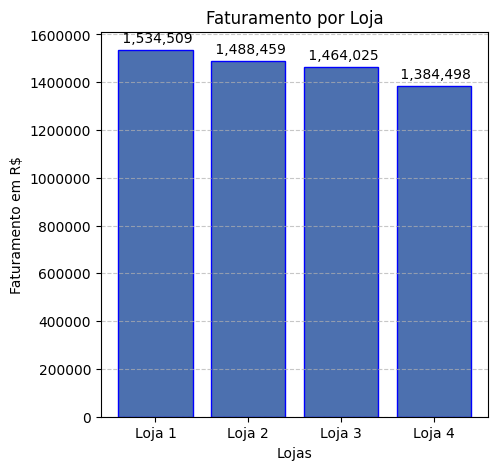

In [5]:
plt.figure(figsize=(5,5))
barras = plt.bar(lojas, faturamentos, color='#4c70af', edgecolor='blue')

plt.title('Faturamento por Loja', fontsize=12)
plt.xlabel('Lojas', fontsize=10)
plt.ylabel('Faturamento em R$', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.ticklabel_format(style='plain', axis='y')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 20000, f' {yval:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.show()

# 2. Vendas por Categoria


In [6]:
venda_categoria_loja1 = loja['Categoria do Produto'].value_counts()
venda_categoria_loja2 = loja2['Categoria do Produto'].value_counts()
venda_categoria_loja3 = loja3['Categoria do Produto'].value_counts()
venda_categoria_loja4 = loja4['Categoria do Produto'].value_counts()

print("Loja 1:")
print(venda_categoria_loja1)
print("\nLoja 2:")
print(venda_categoria_loja2)
print("\nLoja 3:")
print(venda_categoria_loja3)
print("\nLoja 4:")
print(venda_categoria_loja4)

Loja 1:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 2:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 3:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 4:
Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e lazer     

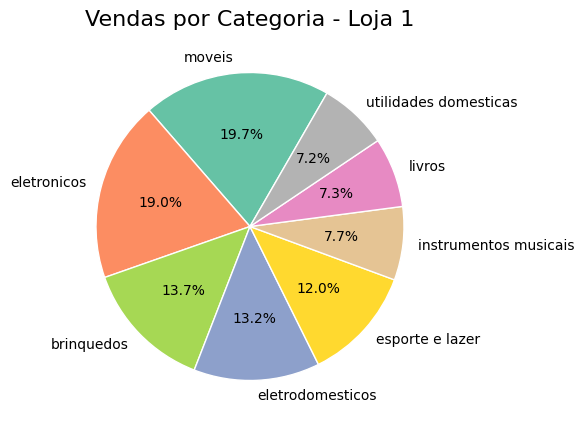

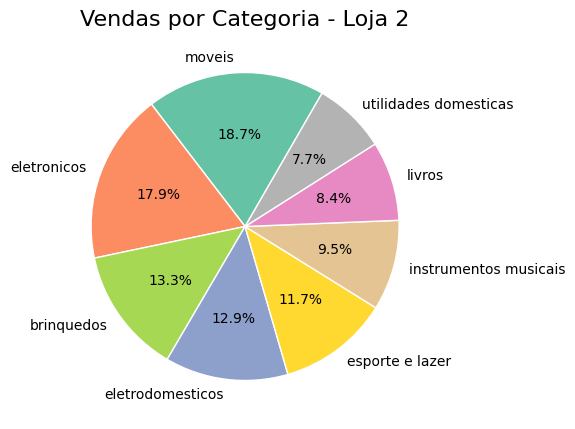

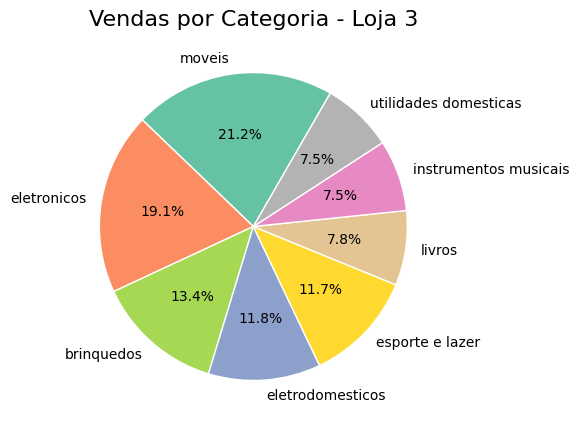

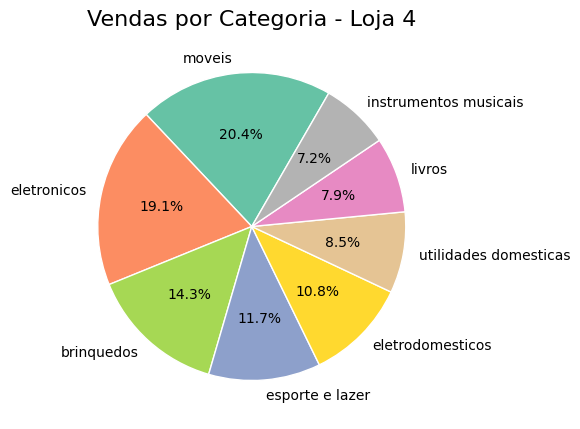

In [7]:
import matplotlib.pyplot as plt

# As vendas por categoria de cada loja
dados_lojas = [venda_categoria_loja1, venda_categoria_loja2, venda_categoria_loja3, venda_categoria_loja4]
titulos = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Paleta de cores
cores = ['#66c2a5', '#fc8d62', '#a6d854', '#8da0cb', '#ffd92f', '#e5c494', '#e78ac3', '#b3b3b3']

# Loop para gerar os gráficos
for i in range(4):
    dados = dados_lojas[i]

    explode = [0.1 if valor == dados.max() else 0 for valor in dados]

    plt.figure(figsize=(5,5))
    plt.pie(
        dados,
        labels=dados.index,
        autopct='%1.1f%%',
        startangle=60,
        colors=cores,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(f'Vendas por Categoria - {titulos[i]}', fontsize=16)
    plt.show()

# 3. Média de Avaliação das Lojas

In [8]:
media_avaliacao_loja1 = loja['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

# Exibindo os resultados
print(f"Média de Avaliação da Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação da Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação da Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação da Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação da Loja 1: 3.98
Média de Avaliação da Loja 2: 4.04
Média de Avaliação da Loja 3: 4.05
Média de Avaliação da Loja 4: 4.00


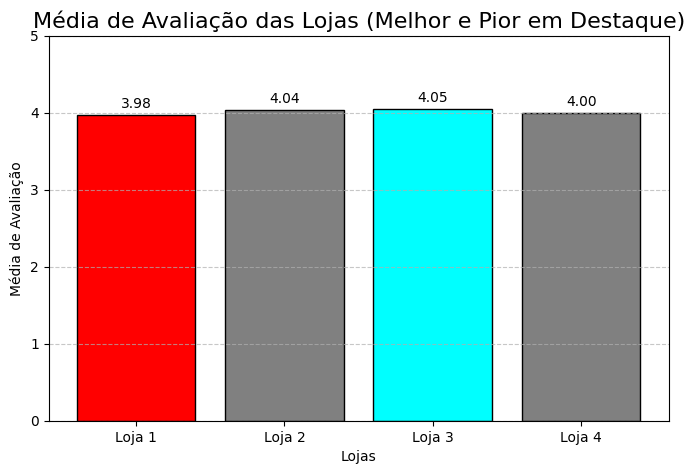

In [9]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

melhor_media = max(medias)
pior_media = min(medias)

cores = []
for media in medias:
    if media == melhor_media:
        cores.append('cyan')  # Melhor loja → verde
    elif media == pior_media:
        cores.append('red')    # Pior loja → vermelho
    else:
        cores.append('gray')

plt.figure(figsize=(8,5))
barras = plt.bar(lojas, medias, color=cores, edgecolor='black')

plt.title('Média de Avaliação das Lojas (Melhor e Pior em Destaque)', fontsize=16)
plt.xlabel('Lojas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [10]:
produto_mais_vendido_loja1 = loja['Produto'].value_counts().idxmax()
produto_menos_vendido_loja1 = loja['Produto'].value_counts().idxmin()

produto_mais_vendido_loja2 = loja2['Produto'].value_counts().idxmax()
produto_menos_vendido_loja2 = loja2['Produto'].value_counts().idxmin()

produto_mais_vendido_loja3 = loja3['Produto'].value_counts().idxmax()
produto_menos_vendido_loja3 = loja3['Produto'].value_counts().idxmin()

produto_mais_vendido_loja4 = loja4['Produto'].value_counts().idxmax()
produto_menos_vendido_loja4 = loja4['Produto'].value_counts().idxmin()

print("Loja 1 - Mais vendido:", produto_mais_vendido_loja1)
print("Loja 1 - Menos vendido:", produto_menos_vendido_loja1)

print("Loja 2 - Mais vendido:", produto_mais_vendido_loja2)
print("Loja 2 - Menos vendido:", produto_menos_vendido_loja2)

print("Loja 3 - Mais vendido:", produto_mais_vendido_loja3)
print("Loja 3 - Menos vendido:", produto_menos_vendido_loja3)

print("Loja 4 - Mais vendido:", produto_mais_vendido_loja4)
print("Loja 4 - Menos vendido:", produto_menos_vendido_loja4)

Loja 1 - Mais vendido: Micro-ondas
Loja 1 - Menos vendido: Headset
Loja 2 - Mais vendido: Iniciando em programação
Loja 2 - Menos vendido: Jogo de tabuleiro
Loja 3 - Mais vendido: Kit banquetas
Loja 3 - Menos vendido: Blocos de montar
Loja 4 - Mais vendido: Cama box
Loja 4 - Menos vendido: Guitarra


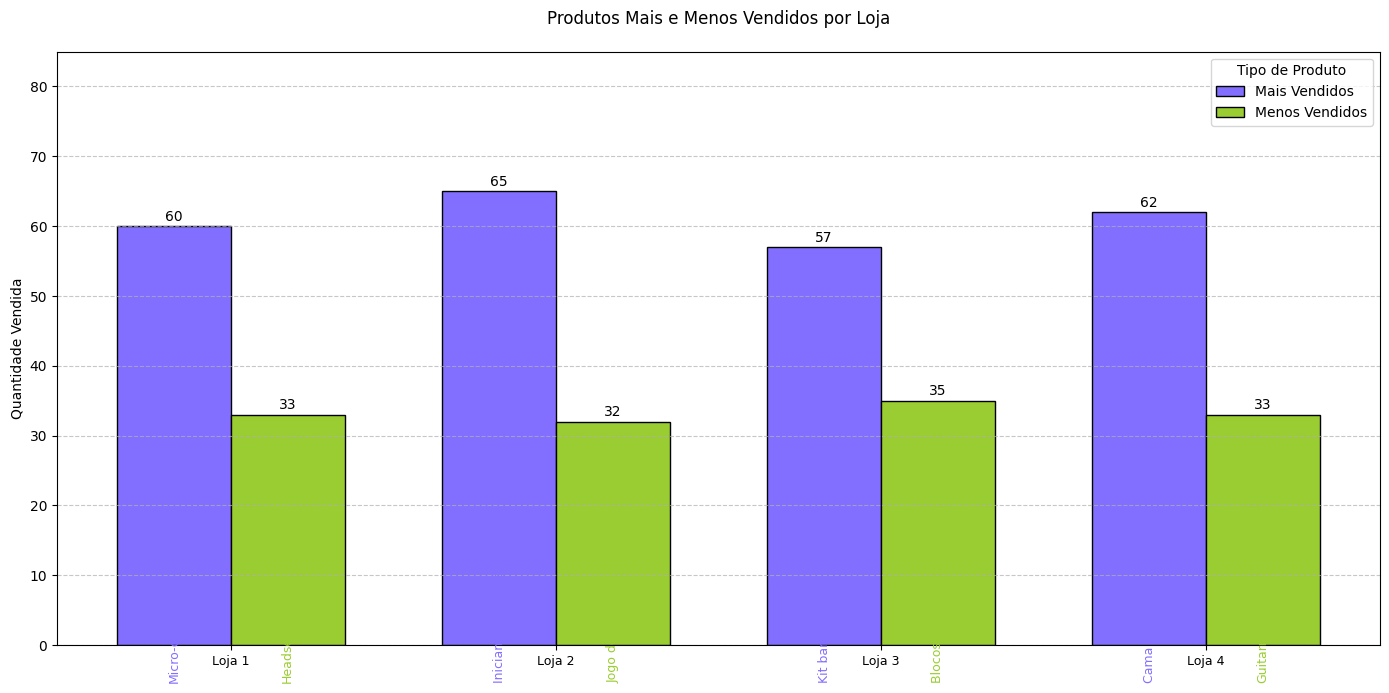


Resumo dos Produtos Mais e Menos Vendidos:

Loja 1
   🔹 Produto mais vendido: Micro-ondas - 60 vendas.
   🔸 Produto menos vendido: Headset - 33 vendas.

Loja 2
   🔹 Produto mais vendido: Iniciando em programação - 65 vendas.
   🔸 Produto menos vendido: Jogo de tabuleiro - 32 vendas.

Loja 3
   🔹 Produto mais vendido: Kit banquetas - 57 vendas.
   🔸 Produto menos vendido: Blocos de montar - 35 vendas.

Loja 4
   🔹 Produto mais vendido: Cama box - 62 vendas.
   🔸 Produto menos vendido: Guitarra - 33 vendas.



In [11]:
import matplotlib.pyplot as plt
import numpy as np

def filtrar_produto_mais_e_menos_vendido(loja):
    produto_mais_vendido = loja["Produto"].value_counts().idxmax()
    qntd_produto_mais_vendido = loja['Produto'].value_counts().max()

    produto_menos_vendido = loja["Produto"].value_counts().idxmin()
    qntd_produto_menos_vendido = loja['Produto'].value_counts().min()

    return (produto_mais_vendido, qntd_produto_mais_vendido, produto_menos_vendido, qntd_produto_menos_vendido)

lojas_nomes = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

dados_lojas = [filtrar_produto_mais_e_menos_vendido(loja),
               filtrar_produto_mais_e_menos_vendido(loja2),
               filtrar_produto_mais_e_menos_vendido(loja3),
               filtrar_produto_mais_e_menos_vendido(loja4)]

produtos_mais_vendidos = [dados[0] for dados in dados_lojas]
qtds_mais_vendidos = [dados[1] for dados in dados_lojas]
produtos_menos_vendidos = [dados[2] for dados in dados_lojas]
qtds_menos_vendidos = [dados[3] for dados in dados_lojas]

x = np.arange(len(lojas_nomes))
largura = 0.35

fig, ax = plt.subplots(figsize=(14,7))
plt.ylim(0, max(qtds_mais_vendidos) + 20)

cor_mais_vendido = '#836FFF'
cor_menos_vendido = '#9ACD32'

barras_mais = ax.bar(x - largura/2, qtds_mais_vendidos, width=largura, label='Mais Vendidos', color=cor_mais_vendido, edgecolor='black')
barras_menos = ax.bar(x + largura/2, qtds_menos_vendidos, width=largura, label='Menos Vendidos', color=cor_menos_vendido, edgecolor='black')

ax.bar_label(barras_mais, labels=qtds_mais_vendidos, fontsize=10, padding=2)
ax.bar_label(barras_menos, labels=qtds_menos_vendidos, fontsize=10, padding=2)

for i, barra in enumerate(barras_mais):
    ax.text(barra.get_x() + barra.get_width()/2, -5, produtos_mais_vendidos[i], fontsize=9, color=cor_mais_vendido, ha='center', rotation=90)

for i, barra in enumerate(barras_menos):
    ax.text(barra.get_x() + barra.get_width()/2, -5, produtos_menos_vendidos[i], fontsize=9, color=cor_menos_vendido, ha='center', rotation=90)

ax.set_title("Produtos Mais e Menos Vendidos por Loja", fontsize=12, pad=20)
ax.set_ylabel("Quantidade Vendida", fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(lojas_nomes, fontsize=9)
ax.legend(title="Tipo de Produto")
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\nResumo dos Produtos Mais e Menos Vendidos:\n")
for i in range(4):
    print(f"{lojas_nomes[i]}")
    print(f"   🔹 Produto mais vendido: {produtos_mais_vendidos[i]} - {qtds_mais_vendidos[i]} vendas.")
    print(f"   🔸 Produto menos vendido: {produtos_menos_vendidos[i]} - {qtds_menos_vendidos[i]} vendas.\n")

# 5. Frete Médio por Loja


In [12]:
frete_medio_loja1 = loja['Frete'].mean()
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f"Frete médio da Loja 1: R$ {frete_medio_loja1:.2f}")
print(f"Frete médio da Loja 2: R$ {frete_medio_loja2:.2f}")
print(f"Frete médio da Loja 3: R$ {frete_medio_loja3:.2f}")
print(f"Frete médio da Loja 4: R$ {frete_medio_loja4:.2f}")

Frete médio da Loja 1: R$ 34.69
Frete médio da Loja 2: R$ 33.62
Frete médio da Loja 3: R$ 33.07
Frete médio da Loja 4: R$ 31.28


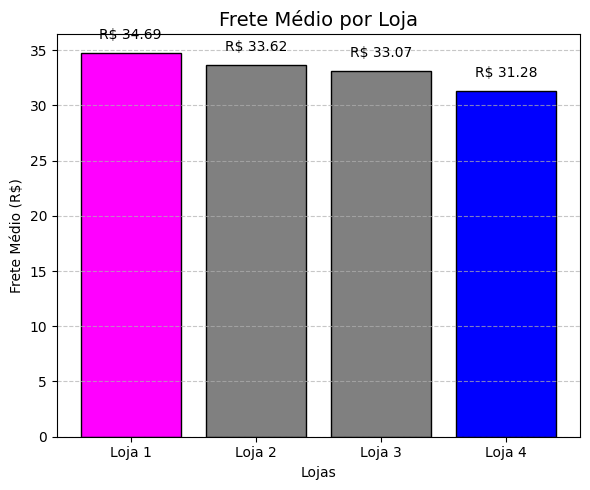

In [13]:
import matplotlib.pyplot as plt

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
fretes = [frete_medio_loja1, frete_medio_loja2, frete_medio_loja3, frete_medio_loja4]

frete_mais_alto = max(fretes)
frete_mais_baixo = min(fretes)

cores = []
for valor in fretes:
    if valor == frete_mais_baixo:
        cores.append('blue')
    elif valor == frete_mais_alto:
        cores.append('magenta')
    else:
        cores.append('gray')

plt.figure(figsize=(6,5))
barras = plt.bar(lojas, fretes, color=cores, edgecolor='black')

plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar o valor em cima de cada barra
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 1, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Relatório de Análise de Dados da Alura Store

## Objetivo
Este projeto tem como alvo ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.
Para isso foi realizada análise de dados de vendas, desempenho e avaliações das 4 lojas da Alura Store (dados fictícios). O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

---

## 1. Análise do Faturamento

Faturamento total de cada loja:

- **Loja 1:** R$ 1.534.509,12
- **Loja 2:** R$ 1.488.459,06
- **Loja 3:** R$ 1.464.025,03
- **Loja 4:** R$ 1.384.497,58

A Loja 1 teve o maior faturamento.  
A Loja 4 teve o menor faturamento.

---

## 2. Análise das Vendas por Categoria

Quantidade de vendas por categoria:

### Loja 1:
- Móveis: 465
- Eletrônicos: 448
- Brinquedos: 324
- Eletrodomésticos: 312
- Esporte e Lazer: 284
- Instrumentos Musicais: 182
- Livros: 173
- Utilidades Domésticas: 171

### Loja 2:
- Móveis: 442
- Eletrônicos: 422
- Brinquedos: 313
- Eletrodomésticos: 305
- Esporte e Lazer: 275
- Instrumentos Musicais: 224
- Livros: 197
- Utilidades Domésticas: 181

### Loja 3:
- Móveis: 499
- Eletrônicos: 451
- Brinquedos: 315
- Eletrodomésticos: 278
- Esporte e Lazer: 277
- Livros: 185
- Instrumentos Musicais: 177
- Utilidades Domésticas: 177

### Loja 4:
- Móveis: 480
- Eletrônicos: 451
- Brinquedos: 338
- Esporte e Lazer: 277
- Eletrodomésticos: 254
- Utilidades Domésticas: 201
- Livros: 187
- Instrumentos Musicais: 170

Todas as lojas têm como principais categorias: móveis e eletrônicos.  
A Loja 4 apresentou um volume geral de vendas um pouco menor.

---

## 3. Média de Avaliação das Lojas

Média de avaliação dos clientes:

- **Loja 1:** 3,98
- **Loja 2:** 4,04
- **Loja 3:** 4,05
- **Loja 4:** 4,00

A Loja 3 apresentou a melhor média de avaliação.  
A Loja 1 apresentou a pior média de avaliação.

---

## 4. Produtos Mais e Menos Vendidos

Identificação dos produtos:

| Loja   | Produto Mais Vendido          | Produto Menos Vendido |
|:-------|:-------------------------------|:----------------------|
| Loja 1 | Micro-ondas                    | Headset               |
| Loja 2 | Iniciando em programação        | Jogo de tabuleiro     |
| Loja 3 | Kit banquetas                   | Blocos de montar      |
| Loja 4 | Cama box                        | Guitarra              |

Observa-se que eletrodomésticos e móveis são os mais populares.

---

## 5. Frete Médio por Loja

Média de frete cobrada em cada loja:

- **Loja 1:** R$ 34,69
- **Loja 2:** R$ 33,62
- **Loja 3:** R$ 33,07
- **Loja 4:** R$ 31,28

A Loja 4 apresentou o menor frete médio.  
A Loja 1 apresentou o maior frete médio.

---

## Conclusão Final

**Recomendação:**  
Com base nos dados analisados, recomenda-se a venda da **Loja 4**, considerando:

- A loja 4 apresentou o **menor faturamento**;
- Apesar de ter o **frete médio mais baixo** apresentou baixo volume de vendas;
- A Loja 4 apresentou um volume geral de vendas um pouco menor, realizando análise considerando que a avaliação se mostrou equiparada com as demais lojas, poderia ter se desempenhado melhor.

#### Com base neste relatório a recomendação é que o Senhor João venda a Loja 4.

---

Alura.

---
